<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/19_Exercise_Skill_Pay_Analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Investigate High Paying Skills

## Topics Covered

This exercise goes over:

* Plotting 
* Customization

## Question

In our project we want to analyze salary data. Here's what we'll be focusing on: 
* Visualize for highest paying skills
* Visualize for highest demanded skills

Load the data.

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Only get data engineer jobs in the Australia
df_DE_AUS = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'Australia')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DE_AUS = df_DE_AUS.dropna(subset=['salary_year_avg'])

### Visualize for highest paying skills

1. Explode out the skills column.

In [6]:
df_DE_AUS = df_DE_AUS.explode('job_skills')

df_DE_AUS[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
27637,147500.0,sql
27637,147500.0,python
27637,147500.0,atlassian
70312,125000.0,python
70312,125000.0,sql


2. Get the highest paying skills (order by highest to lowest).

In [7]:
df_DE_top_pay = df_DE_AUS.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DE_top_pay = df_DE_top_pay.head(10)

df_DE_top_pay

,count,median
job_skills,,
ssis,1,160000.0
bitbucket,1,147500.0
c,1,147500.0
git,1,147500.0
atlassian,1,147500.0
node.js,1,147500.0
powershell,1,131580.0
go,5,131580.0
pyspark,2,129250.0


3. Match up the highest count (demand) of skills and highest median salary by skill for data engineer roles.

In [8]:
df_DE_skills = df_DE_AUS.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DE_skills = df_DE_skills.head(10).sort_values(by='median', ascending=False)

df_DE_skills

,count,median
job_skills,,
go,5,131580.00
aws,12,118000.00
sas,4,111212.50
python,20,106712.50
sql,22,100363.25
azure,12,100354.00
snowflake,6,97108.50
gcp,6,96773.00
docker,4,96773.00


### Plot

5. Let's plot these next to each other using `subplots()`.

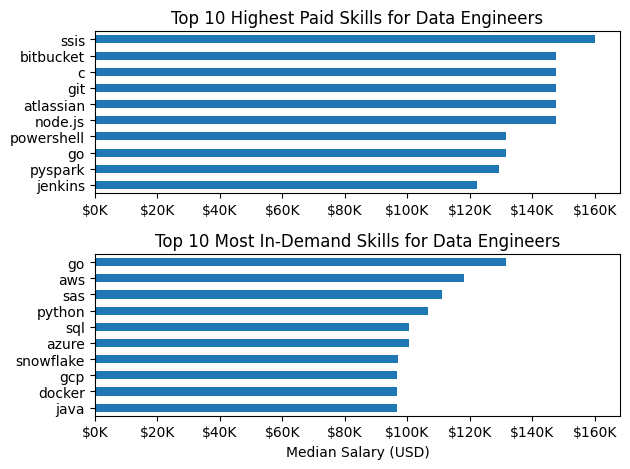

In [10]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Engineers
df_DE_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # ::-1 to reverse the order (hightest at top  )
ax[0].set_title('Top 10 Highest Paid Skills for Data Engineers')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Engineers
df_DE_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Engineers')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()